# Supervised Learning - Project: ReCell
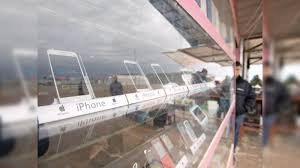

Project by Noor Aftab

###Business Context###

The used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

###Objective###

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market. As a data scientist they want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

###Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros

In [ ]:
###!jupyter nbconvert --to html /content/reCell_V2 (1).ipynb


[NbConvertApp] Converting notebook /reCell_V2.ipynb to html
[NbConvertApp] Writing 2270228 bytes to /reCell_V2.html


## Importing necessary libraries

In [1]:
#Libraries to read & manipulate data
import numpy as np
import pandas as pd

#Libraries to visualize data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries to do test train split
from sklearn.model_selection import train_test_split

#Libraries to make models
from sklearn.linear_model import LinearRegression

#Libraries to model perfromance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Libraries for linear regression
import statsmodels.api as sm

#to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


###Loading the dataset###

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cData = pd.read_csv('/content/drive/MyDrive/Another ReCell/used_device_data (1) (1).csv')

## Data Overview

In [4]:
cData.shape

(3454, 15)

### Displaying the columns of the dataset

In [5]:
cData.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

### Displaying the first few rows of the dataset

In [6]:
cData.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the data types of the columns for the dataset

In [7]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Checking for duplicate values

In [8]:
#code to calcualte duplicated values in the dataset
cData.duplicated().sum()

0

### Statistical summary of the dataset

In [9]:
#code to calcualte missing values from each column and sorting them in descending order
cData.isnull().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:

*   This is a dataset about phones/tablet features with prices
*   The dataset has 3,454 rows and 15 columns
*   The data types of our data include 9 floats, 2 integers and 4 objects.
*   There are a few columns with missing values and we would need to impute values for these columns. The largest missing value column is **main_camera_mp**.
*   There are no duplicate values in our dataset.



In [10]:
cData.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Observations


1.   **Screen Size:** The average screen size of the devices is 13.71 inches, with a standard deviation of 3.81 inches. This suggests a moderate variability in screen sizes.The smallest screen size is 5.08 inches, while the largest is 30.71 inches, indicating a wide range of screen sizes.

2.    **Main Camera Megapixels (MP):** The average main camera quality is 9.46 MP, with a standard deviation of 4.82 MP, indicating a significant variation in camera quality. Half of the devices have a main camera quality of 8 MP or less.

3.    **Selfie Camera Megapixels:**The average selfie camera quality is 6.55 MP, with a high standard deviation of 6.97 MP. This suggests a wide disparity in selfie camera qualities.The minimum is 0 MP, possibly indicating some devices without a selfie camera, and the maximum is 32 MP.

4.    **Internal Memory:**On average, devices have 54.57 GB of internal memory, but with a very high standard deviation of 84.97 GB, indicating a wide range of memory capacities.The memory capacity ranges from as low as 0.01 GB to as high as 1024 GB.


5.   **RAM:** The average RAM is 4.04 GB with a standard deviation of 1.37 GB, showing a moderate level of variation. =The RAM sizes range from 0.02 GB to 12 GB. Most devices (from 25th to 75th percentile) have 4 GB of RAM.

6.  *Battery:*The average battery capacity is 3133.40 mAh, with a standard deviation of 1299.68 mAh. This indicates a considerable variation in battery sizes.The battery capacities range from 500 mAh to 9720 mAh.

7.  **Weight:**The average weight of the devices is 182.75 grams, with a standard deviation of 88.41 grams, suggesting a wide range in device weights. The lightest device weighs 69 grams and the heaviest is 855 grams.

8. **Release Year:**The average release year for the devices is approximately 2016, with a standard deviation of 2.3 years. This indicates that most devices are relatively recent.The dataset includes devices released between 2013 and 2020.

9.  **Days Used:**On average, devices have been used for 674.87 days (about 1.85 years), with a standard deviation of 248.58 days. The range of usage days is from 91 days to 1094 days (about 3 years).

10.  **Normalized Used Price:**The average normalized used price is 4.36, with a standard deviation of 0.59, indicating some variability in the used prices.
The prices range from 1.54 to 6.62.

11.  **Normalized New Price:**The average normalized new price is 5.23, with a standard deviation of 0.68. This shows a moderate range in the new prices of the devices.The prices range from 2.90 to 7.85.



In [11]:
# Code for calculating the number of unique values in each column
for column in cData.columns:
    num_unique_values = cData[column].nunique() #using the nunique function to find unique values in each column
    print(f'Unique values in {column}: {num_unique_values}')

Unique values in brand_name: 34
Unique values in os: 4
Unique values in screen_size: 142
Unique values in 4g: 2
Unique values in 5g: 2
Unique values in main_camera_mp: 41
Unique values in selfie_camera_mp: 37
Unique values in int_memory: 15
Unique values in ram: 12
Unique values in battery: 324
Unique values in weight: 555
Unique values in release_year: 8
Unique values in days_used: 924
Unique values in normalized_used_price: 3094
Unique values in normalized_new_price: 2988


## Exploratory Data Analysis

### Univariate Analysis

####Function for visualizing numerical varaibles using Histogram and BoxPlot##

In [12]:
#The histogram_boxplot function is designed to create a combined visualization
#It includes both a boxplot and a histogram for a specified feature within a given dataframe.
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # Create a figure with two subplots: one for the boxplot and one for the histogram
    f, (ax_box, ax_hist) = plt.subplots(
        2, 1, figsize=figsize, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}
    )

    # Create a boxplot and show means, using 'violet' color
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")

    # Create a histogram with optional KDE curve
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)

    # Add vertical lines for mean and median values in the histogram
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-")

    # Show the combined plot
    plt.show()


####Function for visualizing categorical varaibles using CountPlot##

In [13]:
def labeled_barplot(data, feature, perc=False, n=None, width=6, height=4, annotation_size=8, x_label_size=10):
    """
    Barplot with percentage at the top

    data: dataframe - The dataset to visualize.
    feature: dataframe column - The specific feature/column to visualize.
    perc: whether to display percentages instead of count (default is False) - Boolean flag.
    n: displays the top n category levels (default is None, i.e., display all levels) - Integer.
    width: width of the figure (default 6) - Figure width.
    height: height of the figure (default 4) - Figure height.
    annotation_size: font size for annotations (default 8) - Text size for annotations.
    x_label_size: font size for x-axis labels (default 10) - Text size for x-axis labels.
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()  # Number of unique categories in the feature

    # Create a figure with the specified width and height
    if n is None:
        plt.figure(figsize=(count + 2, height))
    else:
        plt.figure(figsize=(n + 2, height))

    plt.xticks(rotation=90, fontsize=x_label_size)  # Adjust the x-axis label size and rotation

    # Determine the order of categories to display (top n if specified)
    order = data[feature].value_counts().index[:n] if n else None

    # Create a countplot (barplot) using Seaborn
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,  # Set hue to the same variable as x
        palette="Paired",
        order=order,
        legend=False  # Suppress the legend
    )

    # Annotate each bar with counts or percentages
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each category
        else:
            label = p.get_height()  # Count of each category

        x = p.get_x() + p.get_width() / 2  # X-coordinate of the annotation
        y = p.get_height()  # Height of the bar

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=annotation_size,  # Adjust the annotation text size
            xytext=(0, 5),  # Offset the text slightly above the bar
            textcoords="offset points",
        )  # Annotate the bar with count or percentage

    plt.tight_layout()  # Adjust spacing to fit annotations
    plt.show()  # Show the plot

###Normalized Used Price###

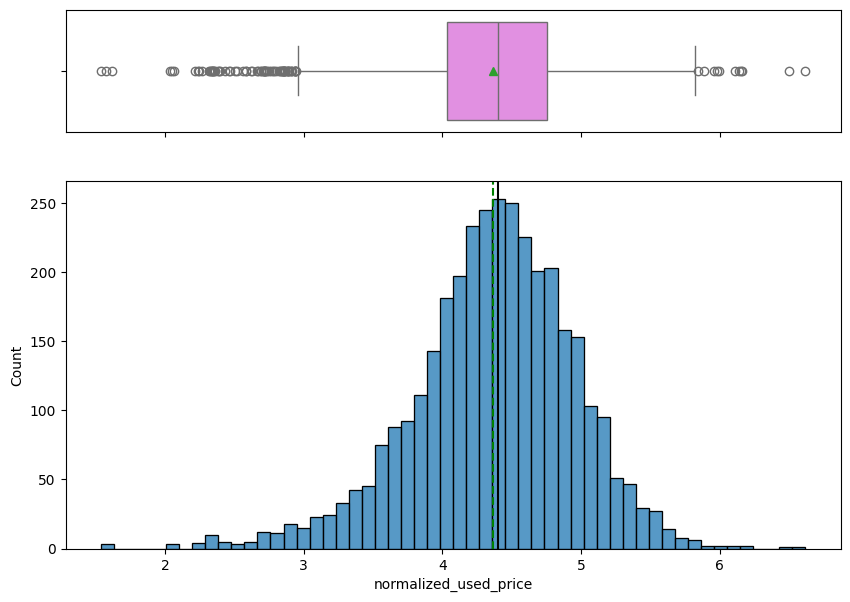

In [14]:
histogram_boxplot(cData, "normalized_used_price")

###Observations###

*   We observe from the histogram the distribution of used prices is approximately normally distributed (evidenced by the bell-shaped curve).

*   The mean and median are very close, which suggests that there is not a strong skew in the data.

*   There are outliers on both the lower and higher ends, as indicated by the dots outside of the whiskers on the boxplot. However, the majority of data points fall within the interquartile range (IQR), which is the box's boundaries in the boxplot.

*   The close proximity of the mean and median in the used price distribution suggests that this data could be a good candidate for linear regression without much need for transformation.



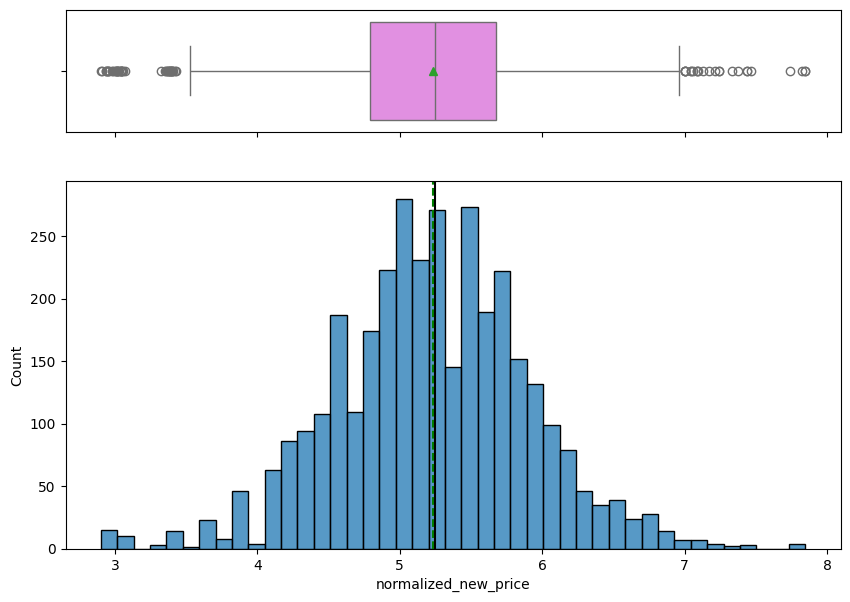

In [15]:
## Create histogram_boxplot for 'normalized_new_price'
histogram_boxplot(cData, "normalized_new_price")

####Observations####

*   The distribution of new prices seems to be slightly right-skewed, which means there are more data points on the higher end of the price range.

*   There's a peak slightly to the right of the median, suggesting that most devices have a new price around this value, but there are enough higher-priced devices to skew the mean to the right.


###Screen Size###

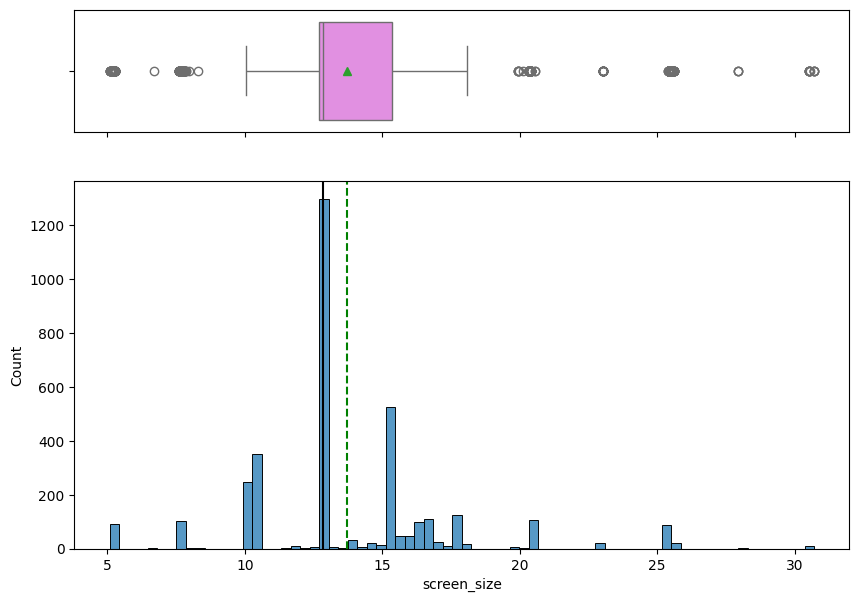

In [16]:
histogram_boxplot(cData, "screen_size")

####Observations:####
*   The histogram indicates that the screen size distribution is not normal and is heavily right-skewed, with a large number of devices having smaller screen sizes and fewer devices having very large screens.

*   There is a significant peak around 12 to 15 inches, which likely represents the most common screen sizes for tablets and possibly laptops, as phones typically do not reach screen sizes of 12 inches or more. The distribution of screen sizes suggests that the dataset may include a range of devices beyond phones.

*   The mean screen size is slightly to the right of the median, which is consistent with the skew observed in the histogram.

*   There are outliers present on the higher end, as indicated on the boxplot, suggesting that there are some devices with exceptionally large screen sizes.


###Main_Camera_mp###

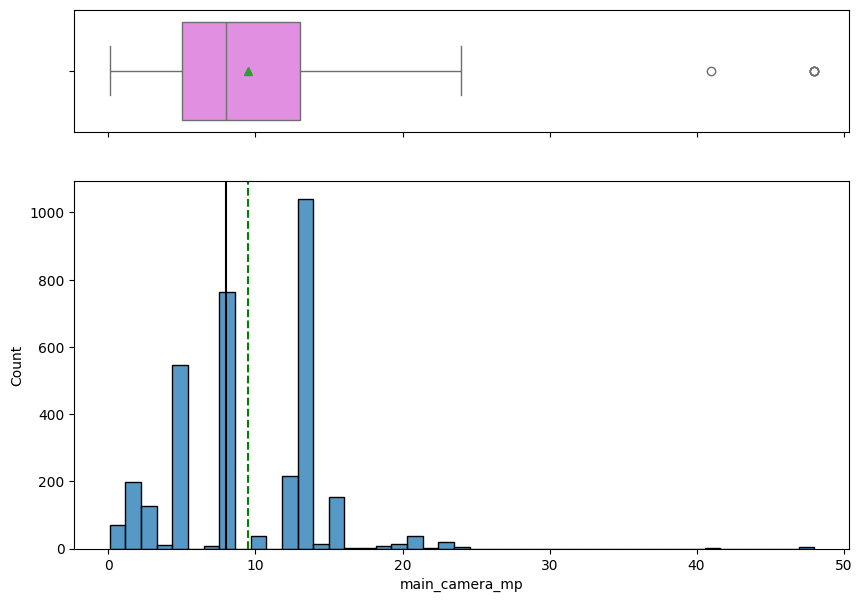

In [17]:
histogram_boxplot(cData, "main_camera_mp")

####Observations####

*   The histogram for main camera megapixels shows a distribution that is left-skewed. This indicates that there are a number of devices with higher megapixel counts, but a large number of devices cluster around a lower megapixel range.

*   The mean megapixel count is slightly higher than the median, which aligns with the left skew observed in the histogram.

*   The boxplot shows a number of outliers on the higher end, which suggests that there are some devices with significantly higher main camera megapixel counts than the general population of devices.
*   The interquartile range is relatively tight, indicating that the middle 50% of the devices have megapixel counts within a relatively small range.

*   The dataset could contain a mix of basic models with lower megapixel cameras and a smaller number of high-end models with advanced camera specifications.

###Selfie_Camera_mp###

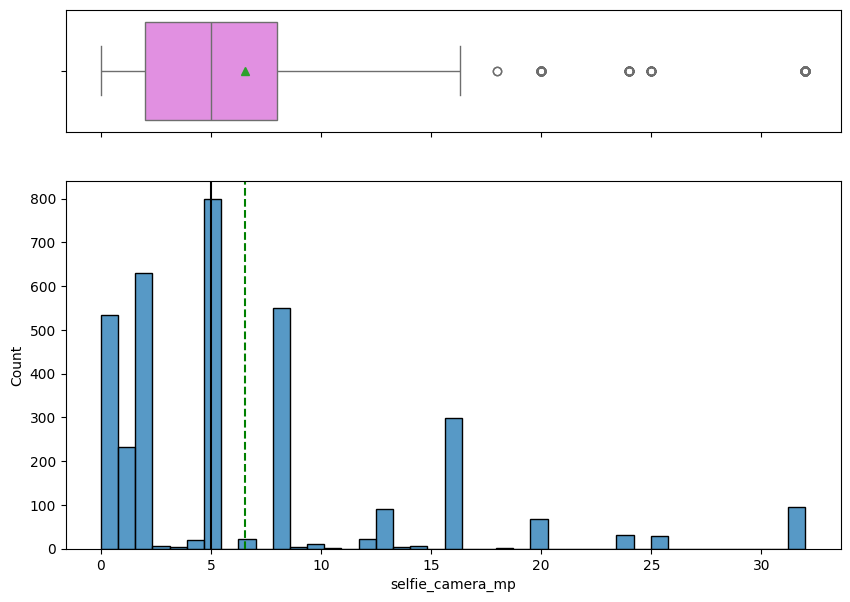

In [18]:
histogram_boxplot(cData, "selfie_camera_mp")

####Observations####

*   The histogram for selfie camera megapixels displays a left-skewed distribution, with a larger number of devices having lower selfie camera megapixels, and fewer devices having high selfie camera megapixels.

*   The mean is again to the right of the median, but the difference appears less pronounced compared to the distribution of the main camera megapixels. This could suggest a slightly less skewed distribution for the selfie cameras compared to the main cameras.

*   The distribution of selfie camera megapixels is multimodal, with several peaks observed. This suggests that there are likely popular standard specifications for selfie cameras in the market that multiple devices adhere to.

*   This feature might have several typical values that correspond to common selfie camera specifications in various phone models.



###Int_memory###

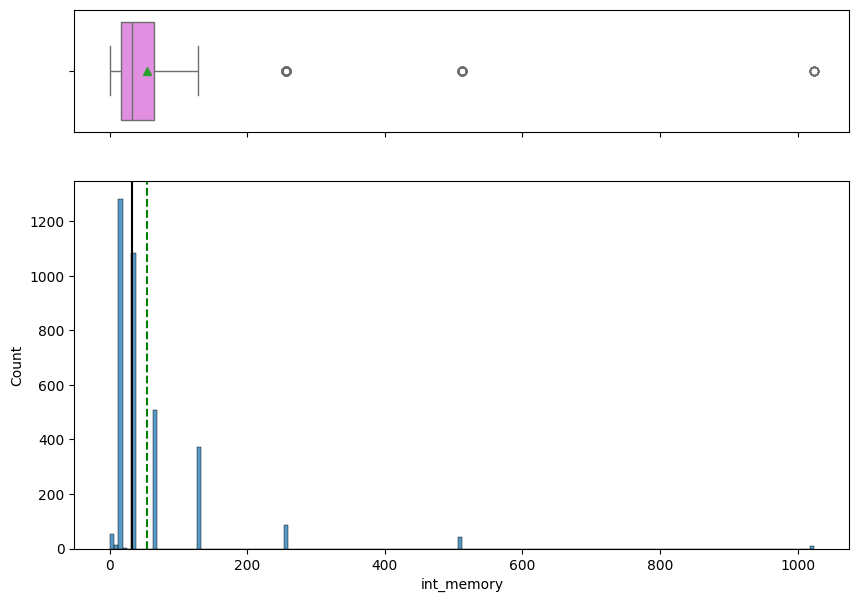

In [19]:
histogram_boxplot(cData, "int_memory")


####Observations####

*   We observe a high right-skew for internal memory indicating that most devices having lower internal memory values and a long tail extends towards the higher internal memory values.

*   The mean is located to the right of the median, which is consistent with a right-skewed distribution. This suggests that while most devices have a lower amount of internal memory, there are enough devices with high memory to pull the mean up.

*   There are a significant number of outliers, which is visible from the boxplot, indicating that some devices have an exceptionally high amount of internal memory.

*   The histogram also shows that internal memory sizes are grouped around certain values, which may correspond to common manufacturing specifications (as 16 GB, 32 GB, 64 GB, etc.).



###ram###

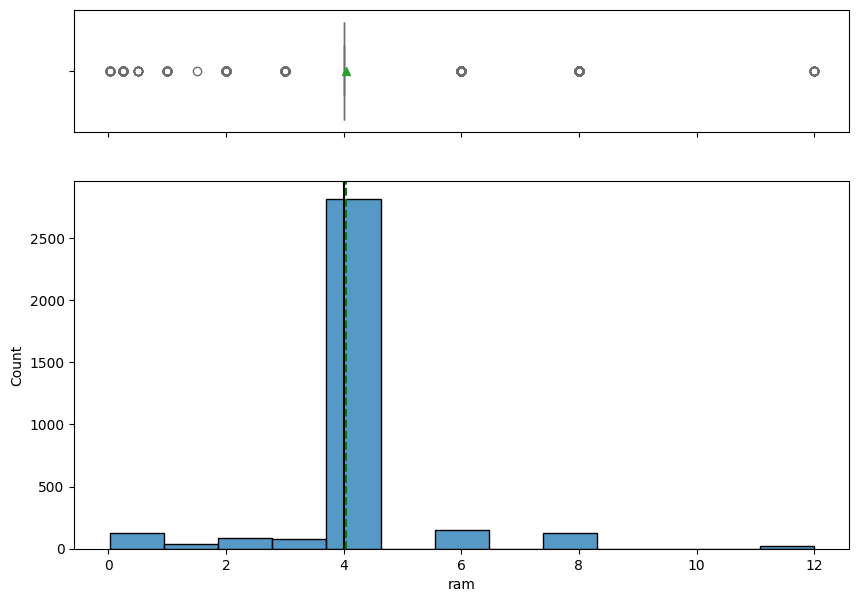

In [20]:
histogram_boxplot(cData, "ram")

####Observations####

*   The histogram for the RAM variable shows a very sharp peak at around 4 GB, indicating that the majority of the devices in the dataset have 4 GB of RAM. This suggests a standardization around this specification in the market.

*   The distribution is quite discrete and not continuous, which is typical for RAM values as they are often manufactured in specific increments (e.g., 2 GB, 4 GB, 6 GB, etc.).

*   There are outliers present, as seen in the boxplot, where some devices have RAM sizes that are significantly higher than the majority.

*   The mean and median are both located at the peak of 4 GB, which indicates a low level of skew.

*   Given the concentration of values at 4 GB, the RAM feature may not have a high variance, and in terms of predictive modeling, it may not be as informative unless the outliers are indicative of price differences.

###weight###

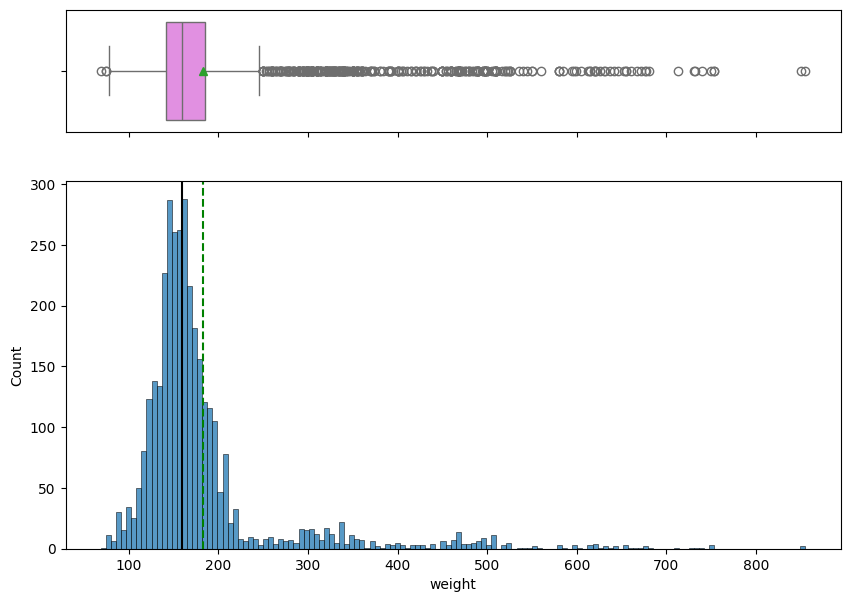

In [21]:
histogram_boxplot(cData, "weight")

####Observations####

*   The histogram for weight shows a distribution that is approximately normal but with a slight right skew, indicating that while most devices have a moderate weight, there is a tail of heavier devices.

*   The mean is very close to the median, as indicated by the green (mean) and black (median) lines almost overlapping, suggesting a fairly symmetric distribution of device weight.

*   There are outliers, particularly on the heavier side, as seen on the boxplot. These could represent particularly large/rugged devices.

*   The spread of weights suggests a diversity in device types, ranging from lighter phones to potentially heavier tablets and laptops.

###battries###

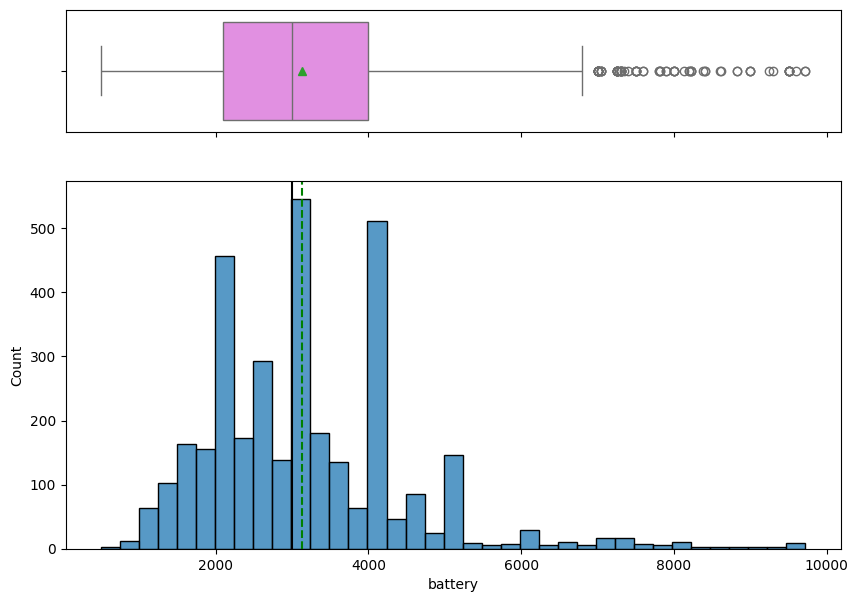

In [22]:
histogram_boxplot(cData, "battery")

###Observations###

*   The histogram for battery capacity shows a multimodal distribution, with several peaks, which indicates that there are several common battery capacities among the devices in the dataset.

*   The mean battery capacity is slightly to the right of the median, as seen by the green (mean) and black (median) lines, suggesting a mild right skew in the distribution.

*   There are quite a few outliers on the higher end, as seen in the boxplot, indicating that some devices have exceptionally large battery capacities.

*   The presence of multiple peaks suggests that the battery capacities in devices may come in standard sizes, and these standard sizes are common across multiple devices.


###days_used###

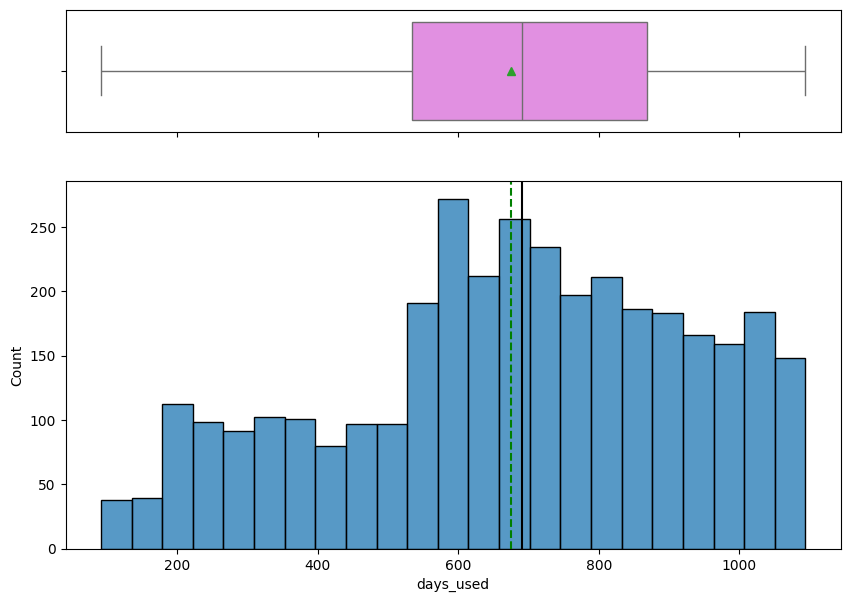

In [23]:
histogram_boxplot(cData, "days_used")

####Observations####

*   The histogram for days_used shows a roughly normal distribution, but with a slight right skew. This suggests that while many devices have a moderate amount of use, there is a long tail of devices that have been used for longer periods.

*   We observe that the mean is slightly higher than the median. This is consistent with the slight right skew observed in the histogram.

*   The boxplot shows a fairly even distribution across the quartiles, but there are outliers on the higher end, indicating some devices have been used significantly longer than most.

*   The distribution is relatively broad, suggesting a wide variety in the number of days devices have been used before being sold or traded in.

###brand_name###

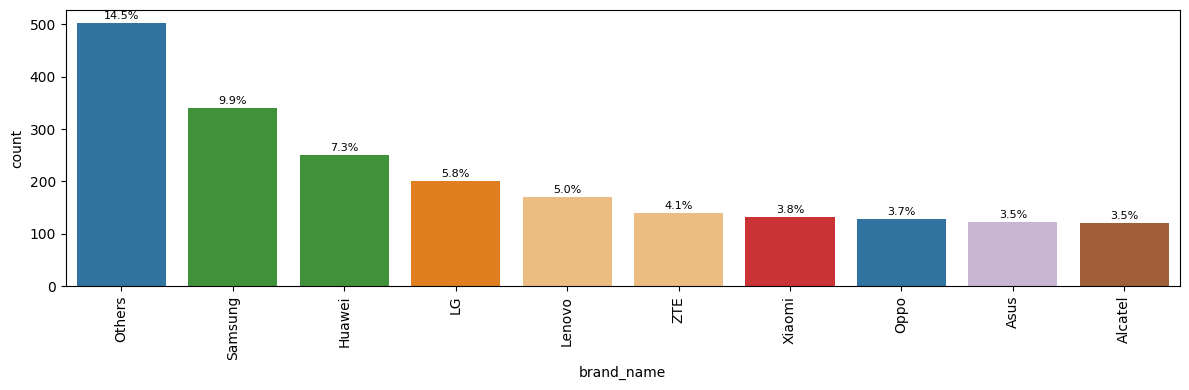

In [24]:
labeled_barplot(cData, "brand_name", perc=True, n=10)

####Observations####

*   The category labeled "Others" comprises the largest group, with 14.5% of the total count, suggesting that there is a wide variety of brands represented in the dataset that do not fall into the top few specified categories.

*   The next most common brands are Samsung and Huawei with 9.9% and 7.3% respectively, indicating that these brands are well-represented in the dataset.

*   The presence of brands such as LG, Lenovo, ZTE, Xiaomi, Oppo, Asus, and Alcatel, each ranging from 3.5% to 5.8%, shows a diversity of devices from different manufacturers.

*   The distribution of brands shows that while there is some concentration in known brands, the market for used devices is quite fragmented, with a substantial portion of devices coming from a variety of other manufacturers.


###os###

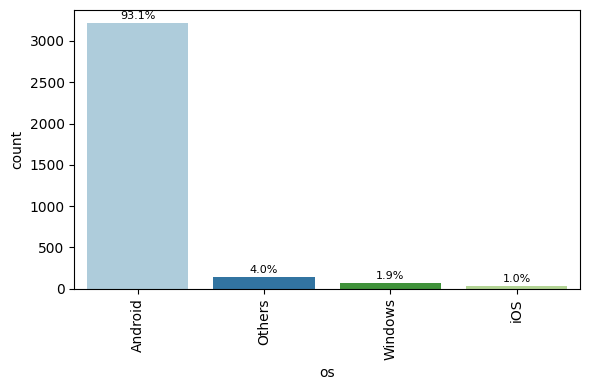

In [25]:
labeled_barplot(cData, "os", perc=True, n=4)

####Observations####

*   The operating system distribution is overwhelmingly dominated by Android, which accounts for 93.1% of the devices in the dataset. This reflects the high market penetration of Android devices in the mobile and tablet markets.

*   The category labeled "Others" has a small presence at 4.0%, which might include various less common operating systems.

*   Windows and iOS have a much smaller share at 1.9% and 1.0% respectively, suggesting that the dataset predominantly consists of Android devices and that Windows and iOS devices are relatively rare in this used and refurbished market segment.

*   The very small presence of iOS could be due to several factors such as a lower turnover rate in the secondary market or higher retention of Apple devices by original owners.

###4g###

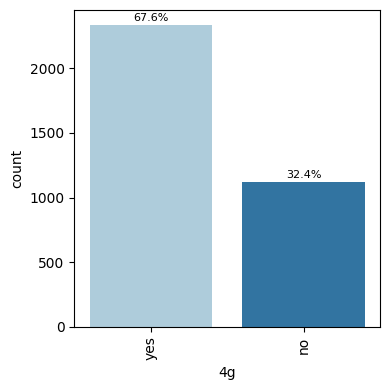

In [26]:
labeled_barplot(cData, "4g", perc=True, n=2)

####Observations####

*   A majority of devices in the dataset, approximately 67.6%, are 4G capable. This suggests that 4G technology is well-established and common among the used devices, reflecting the global adoption rate of 4G connectivity in recent years.

*   The significant presence of 4G-capable devices in the used market could imply a standard expectation of 4G connectivity among consumers purchasing used devices.

*   Devices without 4G capability make up 32.4% of the dataset. This could represent older models or certain budget devices where 4G was not a standard feature.

###5g###

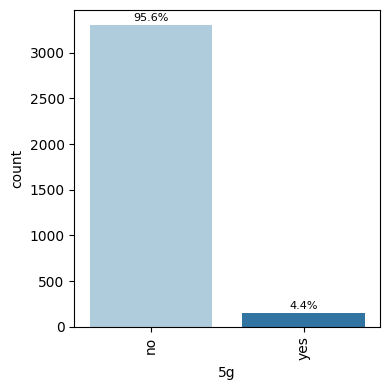

In [27]:
labeled_barplot(cData, "5g", perc=True)

####Observations:####

*   The vast majority of devices, 95.6%, do not have 5G capability, indicating that 5G is not yet widely adopted in the used device market covered by this dataset.

*   Only 4.4% of devices are 5G capable, reflecting the nascent stage of 5G rollout and adoption during the period these devices were released or the data was collected.

*   Given the current growth and interest in 5G technology, it is likely that the proportion of 5G-capable devices will increase in the used market over time.

###release_year###

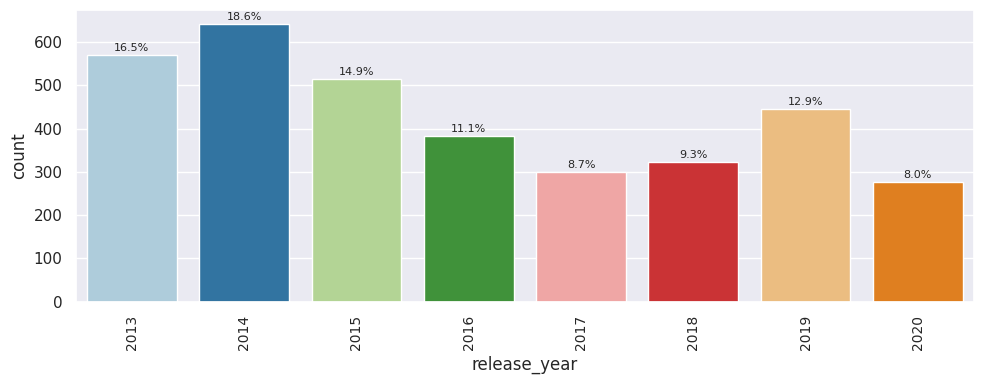

In [ ]:
labeled_barplot(cData, "release_year", perc=True)

####Observations####

*   The release year data shows a range of devices from 2013 to 2020, with a higher concentration of devices released between 2013 and 2015. These years account for the largest shares, with 18.6% in 2014 being the peak.

*   The percentage of devices gradually decreases from 2016 onwards, with each subsequent year representing a smaller proportion of the dataset.
The decrease in the proportion of newer devices (from 2016 to 2020) could indicate a tendency for users to hold onto newer devices longer, or it may reflect the growth of the market over time.

*   Devices released in 2020 represent 8% of the dataset, which may suggest either a lower initial sale volume for these devices, lower turnover in the used market, or the data collection may not fully capture the most recent devices at the time of the dataset creation

##Bivariate Analysis##

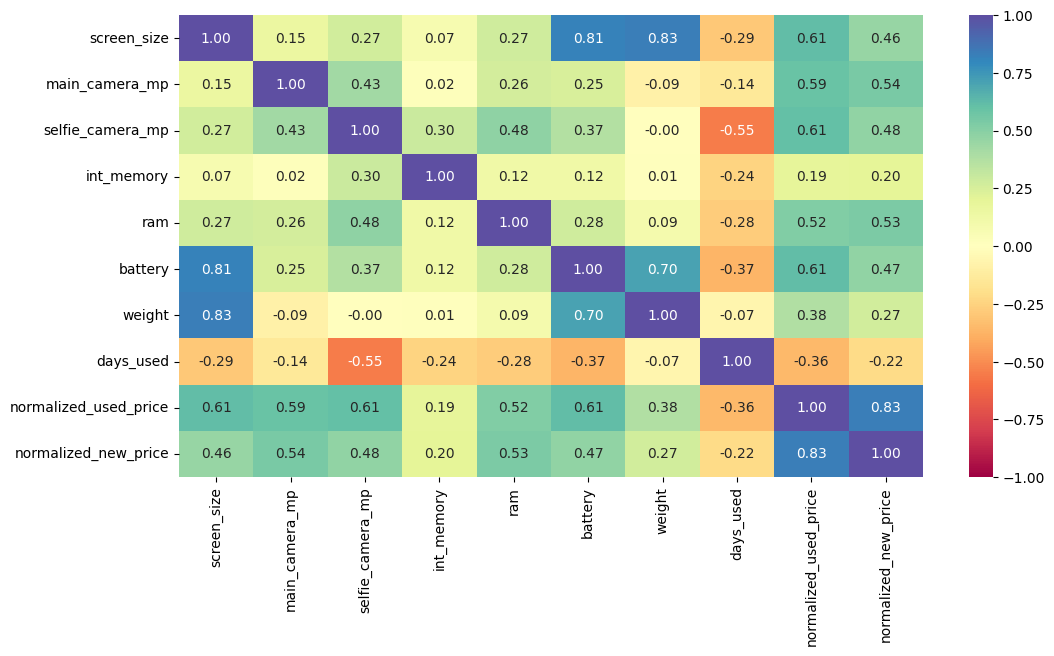

In [28]:
cols_list = cData.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(12, 6))
sns.heatmap(
    cData[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Observations###

*   **Screen Size:** There is a very strong positive correlation between screen size and weight, which is expected since larger devices tend to weigh more.
Screen size also has a moderate positive correlation with the normalized used price, indicating that larger screens may contribute to a higher resale price.

*   **Main Camera Megapixels (main_camera_mp):** There's a moderate positive correlation between main camera megapixels and selfie camera megapixels, suggesting that devices with better main cameras also tend to have better selfie cameras.Main camera megapixels show a moderate positive correlation with both normalized used price and new price, indicating that camera quality could be a significant factor in pricing.

*   **Selfie Camera Megapixels (selfie_camera_mp):** Besides its correlation with the main camera, selfie camera megapixels also have a moderate positive correlation with RAM, possibly suggesting that higher-end devices tend to have better specifications overall, including camera quality.

*   **Internal Memory (int_memory):** Internal memory shows only a weak to moderate positive correlation with other features, indicating that it doesn't strongly predict any other single feature in the dataset.

*   **RAM:** RAM has a moderate positive correlation with selfie camera megapixels and a moderate correlation with both normalized used price and new price, suggesting that higher RAM is associated with higher device pricing.

*   **Battery:** Battery has a very strong positive correlation with weight and a moderate positive correlation with screen size, reflecting the fact that larger devices, which have bigger screens, also tend to have larger batteries.

*   **Weight:** Weight correlates very strongly with battery and screen size, which is logical as larger batteries and screens contribute to the overall weight of the device.

*   **Days Used:** Days used has a moderate negative correlation with selfie camera megapixels, suggesting that newer models with more advanced selfie cameras are less likely to have been used for extended periods.
There is also a moderate negative correlation between days used and normalized used price, indicating that devices used for longer periods tend to sell for less.

*   **Normalized Used Price:** Normalized used price has a strong positive correlation with normalized new price, which is expected since devices that are more expensive when new tend to retain higher resale values. There is a moderate to strong positive correlation between normalized used price and features like screen size, main camera megapixels, selfie camera megapixels, and RAM, suggesting these features are important in determining the resale price.

*   **Normalized New Price:** As mentioned, there is a strong positive correlation between normalized new price and the normalized used price.

There are moderate positive correlations with main camera megapixels, selfie camera megapixels, and RAM, indicating that these features are influential in the original pricing of the devices.

These correlations can provide valuable insights for developing a pricing model. Features that show stronger correlations with price can be considered more influential and may be prioritized in the modeling process.

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

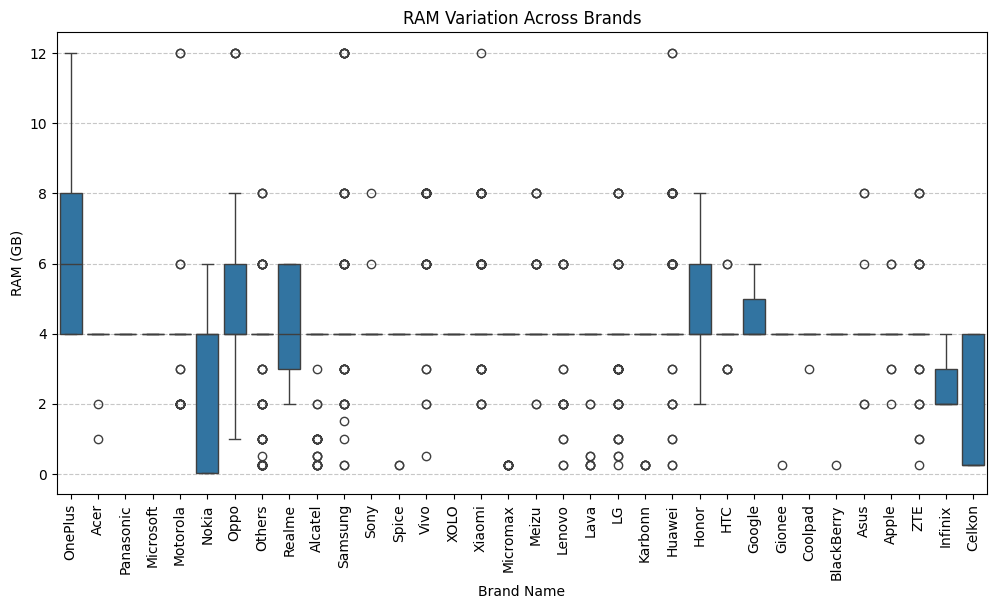

In [29]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=cData, x="brand_name", y="ram", order=cData.groupby("brand_name")["ram"].median().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title("RAM Variation Across Brands")
plt.xlabel("Brand Name")
plt.ylabel("RAM (GB)")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines
plt.show()



####Observations:

*   **Newer Brands and Higher RAM:** It appears that newer brands offer devices with higher RAM capacities. For instance, OnePlus has a minimum RAM around 4 GB, a maximum around 12 GB, and its median RAM is approximately 6 GB. This suggests that OnePlus, which is relatively newer in the market compared to classic brands, tends to equip its devices with more RAM, potentially targeting performance-conscious consumers.

*   **Established Brands and Lower RAM:** Conversely, some of the more established brands seem to offer devices with lower RAM capacities. In particular, brands like Nokia and Celkon have lower RAM values, with their median RAM being close to the lower quartile, suggesting that these historically well-known brands have a range of devices that might cater to the more budget-conscious segment or reflect their earlier releases when lower RAM was the norm.

*   **Brand Variability in RAM Offerings:** There is notable variability among brands when it comes to the RAM in their devices. Brands such as Apple and Samsung show a broad spread of RAM values, indicating a diverse product range that caters to different market segments. The presence of outliers for these brands points to some models with exceptionally high or low RAM, possibly special editions or entry-level models, respectively.

*   **High-Performance Devices:** Certain brands demonstrate a propensity for high-performance devices, indicated by higher median RAM and several outliers above the upper quartile. Brands like Xiaomi and Huawei have models with RAM that extends well above their respective third quartiles, suggesting the availability of high-end models likely designed for more demanding tasks and applications.

*   **Consistency in Brand Offerings:** Some brands exhibit a high degree of consistency in the RAM of their devices. For example, brands like HTC and LG have a relatively narrow interquartile range with fewer outliers, which might indicate a focused range of products with similar specifications, possibly as part of a strategy to maintain a consistent brand image in terms of device performance.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [30]:
cData_large_battery = cData[cData.battery > 4500]
cData_large_battery.shape

(341, 15)

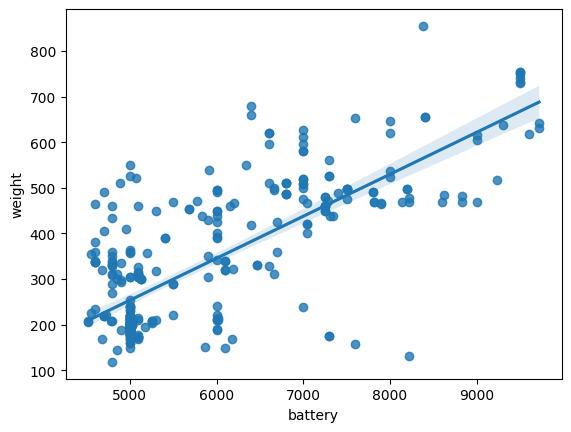

In [31]:
# now lets see how the weight varies for devices with battery > 4500 mAh
sns.regplot(data=cData_large_battery,x=cData_large_battery['battery'],y=cData_large_battery['weight'])
plt.show()

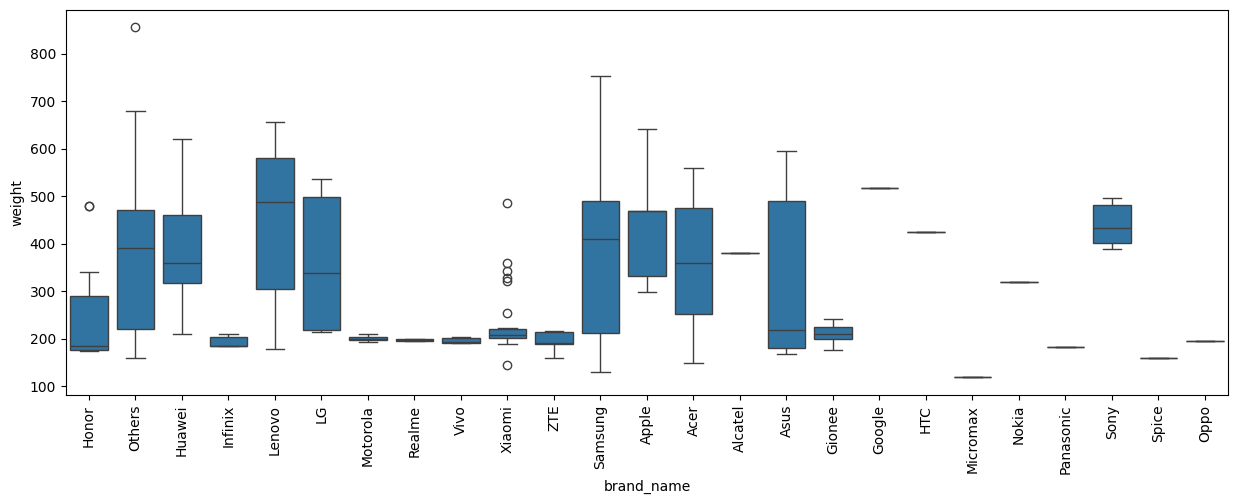

In [32]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cData_large_battery, x='brand_name', y='weight') ## Code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

##Observations##

**Direct Relationship:** There is a direct relationship between battery size and device weight for devices with larger batteries. As the battery capacity increases from 4500 mAh onwards, the weight of the devices also tends to increase.

**Weight Range:** The weight of devices in this category varies broadly from just over 100 grams to upwards of 700 grams. This indicates a wide range of design strategies and target audiences.

**Upper Limit Considerations:** For travelers and users who prioritize device portability, there seems to be an upper limit to battery capacity beyond which the device may become uncomfortably heavy. This could be around the 7000 mAh mark where the weight begins to increase more noticeably.

**Variability in Weight:** There is significant variability in the weight of devices among different brands. Some brands as Huawei, Infinix, and Realme, show a wide range of weights, indicating that they offer a variety of models with potentially large batteries that could cater to different preferences for device heft. Conversly, brands like Sony and Oppo appear to have a relatively narrow weight range, which might suggest a more consistent product line in terms of size and weight.

**Brand Comparison:** When comparing different brands, we can see that brands like Huawei, Samsung, and Xiaomi have devices that are generally heavier. This could imply that these brands offer devices with larger batteries, which are suitable for people who travel frequently and require a long battery life.

**Lightweight Options:** Brands like Acer, Alcatel, ASUS, and particularly Nokia, Panasonic, Sony, and Oppo show a trend towards lighter devices, even considering large battery sizes. This might appeal to users who are concerned about the weight of their devices but still require a large battery.

**Heavyweight Options:** Google and HTC are notable for having a higher median weight for their devices, suggesting that their devices with large batteries tend to be heavier. This might be a consideration for users who prioritize battery size over weight.

**Optimal Choices:** If the aim is to find devices with large batteries that are not uncomfortably heavy, one might look at brands like Motorola, Vivo, and Apple. These brands seem to offer devices with large batteries that don't reach the higher weight extremes seen in some other brands.



**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [33]:
cData_large_screen = cData[cData.screen_size > 6 * 2.54]
cData_large_screen.shape

(1099, 15)

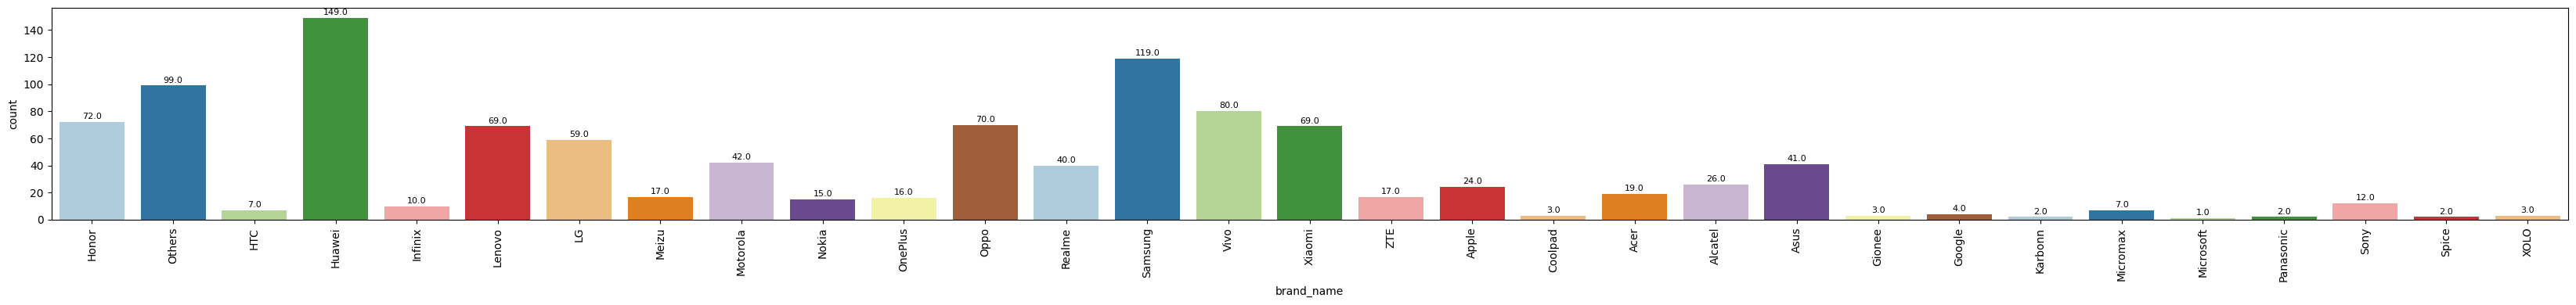

In [34]:
labeled_barplot(cData_large_screen, "brand_name")

**Observations**:

**Popularity of Large Screens by Brand:** The plot shows that certain brands have a notably higher count of devices with large screens. Huawei stands out as the brand with the highest number of large screen devices, followed by Samsung and Xiaomi. This could indicate a strategic focus on consumers who use their devices for entertainment purposes.

**Brand Diversity in Large Screen Offerings:** There is significant diversity among brands in terms of their offerings of large screen devices. While Huawei, Samsung, and Xiaomi have a substantial number of offerings, other brands such as Sony, Sharp, and XOLO have very few devices that meet the large screen criterion.

**Market Positioning of Brands:** Brands with a higher count of large screen devices may be positioning themselves in the market to attract users who prioritize a larger display for activities such as streaming video content, gaming, or reading.

**Niche Brands:** Some brands like Realme, Vivo, and Oppo also have a considerable number of large screen devices, suggesting that these brands are catering to the same market segment as the leading brands but might be positioning their products at different price points or with different feature sets.

**Low Count Brands:** Brands with a low count of large screen devices, such as Google, Alcatel, and Asus, might focus on other selling points or target different market segments that may not prioritize screen size as much.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [35]:
cData_selfie_camera = cData[cData.selfie_camera_mp > 8]
cData_selfie_camera.shape

(655, 15)

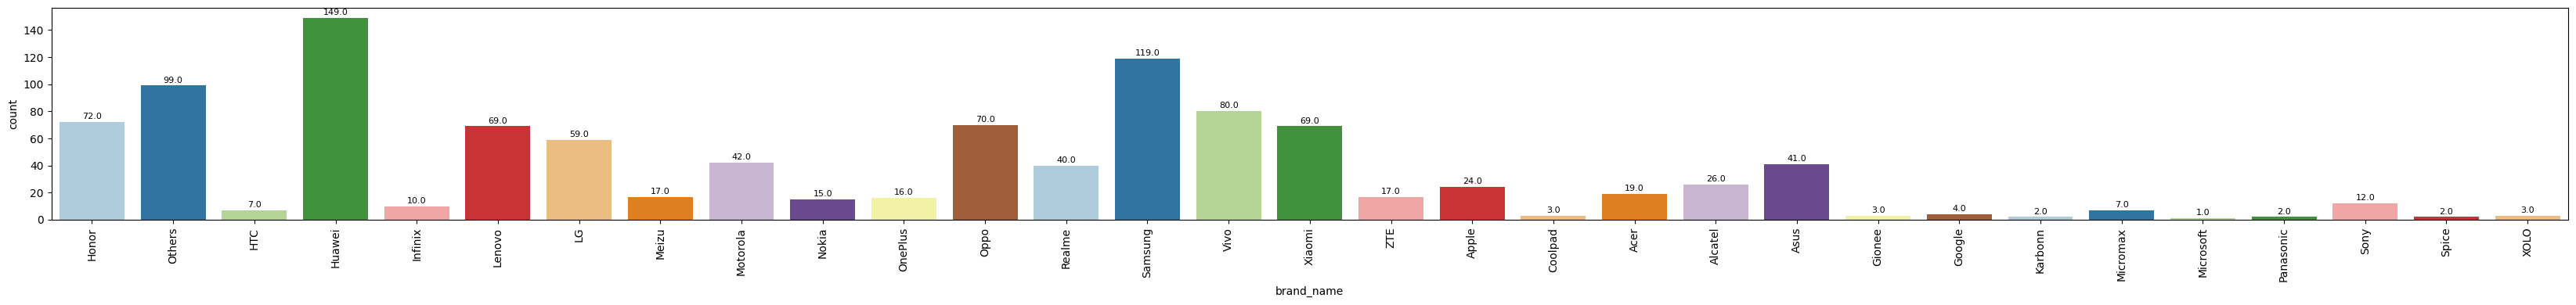

In [36]:
labeled_barplot(cData_large_screen, "brand_name") ## Code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

####Observations####


*   **Brands:** Realme, Samsung, and Xiaomi are the most represented brands in this dataset, suggesting that they offer a significant number of models with potentially good front cameras. This could imply a stronger focus on the selfie camera feature within their product lines or simply a larger variety of models.
There are several brands like HTC, Infinix, and Lenovo that have a moderate representation. Although not as numerous as the leading brands, they still seem to offer a fair number of devices that might have good front cameras.

*   **Limited Options:** Brands like Apple, Google, Acer, and Alcatel have fewer models represented in this dataset. This lower count may indicate fewer options for consumers looking for good front cameras within these brands, or it could be a reflection of a smaller overall product line.

*   **Variety in Options:** The diversity in the count across brands suggests varying marketing strategies and product development focuses. Some brands may be targeting selfie enthusiasts more aggressively than others.

*   **Customer Preferences:** Brands with a higher count of devices, such as Realme, Samsung, and Xiaomi, may be more appealing to customers specifically looking for good selfie cameras, as they seem to offer a wider range of options.

*   **Market Segmentation:** The distribution also reflects market segmentation. Some brands may be targeting the high-end market with a few premium models, while others may be addressing the mid-range or entry-level market segments with a larger number of models.

To form a strategy for ReCell, it would be beneficial to analyze the specific camera specifications in more detail, such as the resolution of the front camera, and to understand how much weight customers place on this feature when making purchasing decisions.


**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [37]:
df_main_camera = cData[cData.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

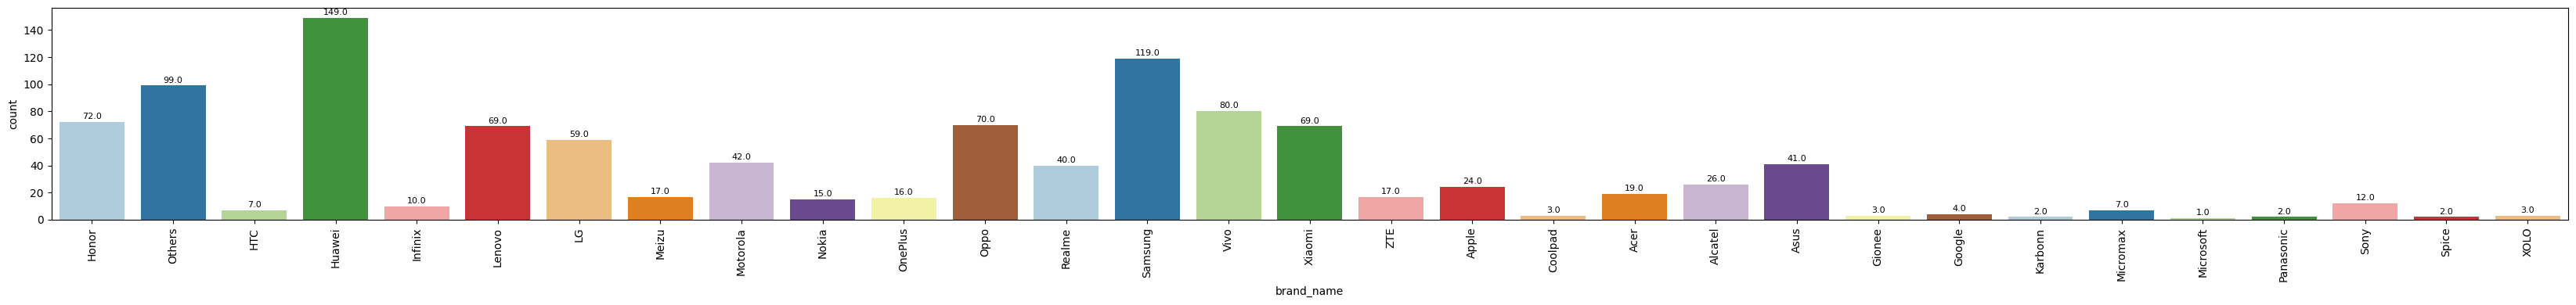

In [38]:
labeled_barplot(cData_large_screen, "brand_name")

####Observations####


*   **High-Resolution Focus:** Realme, Samsung, and Xiaomi again lead in the number of devices with high-resolution rear cameras, indicating that these brands prioritize camera quality in their devices.

*   **Brand Preferences:** Customers looking for high-quality rear cameras might prefer these brands due to the higher count of models meeting the 16MP threshold.

*   **Moderate Options:** Brands like Huawei, Vivo, and Oppo also have a considerable count of devices with high-resolution rear cameras, providing a good range of options for consumers.

*   **Market Positioning:** The counts may reflect each brand's positioning in the market. Brands with more devices could be targeting photography enthusiasts or offering a range of models that appeal to a broad audience.

*   **Customer Trends:** If the trend toward high-quality rear cameras continues to grow, ReCell might focus on acquiring devices that meet or exceed the 16MP threshold to stay relevant to customer demands.

Consideration for ReCell: For ReCell, the popularity of brands with a larger count of high-resolution camera devices could inform inventory decisions. Devices from these brands might command higher resale values or be in greater demand. In summary, for ReCell, understanding which brands offer the most models with high-resolution rear cameras is key. However, it is important to look beyond the megapixel count to assess the overall quality of the camera system, as well as considering current trends and customer preferences when it comes to smartphone photograph



**Let's see how the price of used devices varies across the years.**

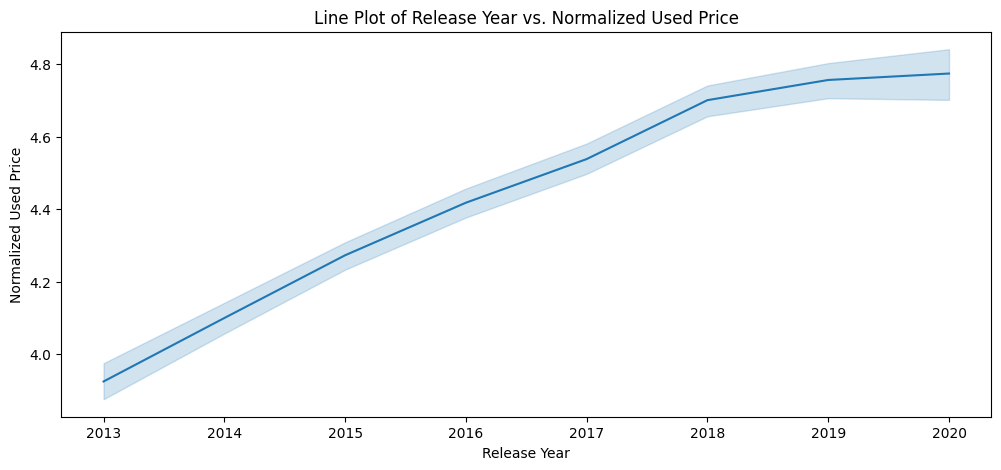

In [39]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=cData, x='release_year', y='normalized_used_price')
plt.xlabel('Release Year')
plt.ylabel('Normalized Used Price')
plt.title('Line Plot of Release Year vs. Normalized Used Price')
plt.show()

####Observations####

*   **Increasing Trend:** There's a clear upward trend in the normalized used price as the release year increases from 2013 to 2020. This suggests that more recently released devices hold their value better in the used market.

*   **Price Depreciation:** Older devices (released around 2013) have lower normalized used prices, which is consistent with the expectation that electronic devices depreciate over time.

**Strategic Implications for ReCell:**

*   **Inventory Focus:** ReCell may want to focus on acquiring and selling devices that are no more than 5–7 years old, as these hold their value better.

*   **Pricing Strategy:** When pricing used devices, ReCell should consider the release year as a significant factor. Newer devices can be priced higher, aligning with the trend shown in the plot.

*   **Trade-In Promotions:** ReCell might consider trade-in promotions for older devices to encourage customers to upgrade through them, thus obtaining stock that can be sold at a higher price point.

*   **Long-Term Planning:** The trend suggests that the value of used devices is not decreasing as quickly as it once was, which might impact long-term pricing and sales strategies.

*   **Consumer Education:** Educate consumers on the benefits of purchasing newer used models, which might have a longer expected lifespan and better features compared to older models.

In conclusion, the data suggests a clear trend that recent release years correlate with higher normalized used prices. ReCell can use this information to adjust its inventory acquisition, pricing, and sales strategies accordingly.



**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

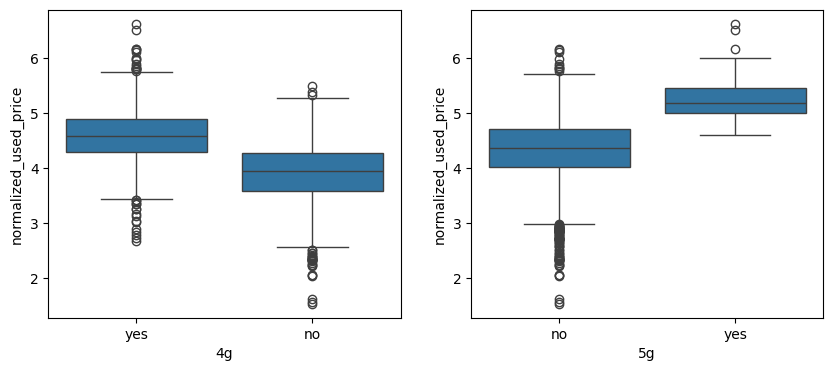

In [40]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=cData, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=cData, x="5g", y="normalized_used_price")

plt.show()

####Observations####


*   **4G vs. Non-4G Devices:** Devices with 4G capability tend to have a higher median normalized used price compared to those without 4G.
The interquartile range (IQR) for 4G devices is tighter and slightly higher, indicating less variability in price but generally higher prices.
There are many outliers on both sides for 4G devices, indicating that while most 4G-capable devices are within a certain price range, there are several that are priced significantly higher or lower.

*   **5G vs. Non-5G Devices:**Devices with 5G capability have a higher median normalized used price than those without 5G.
The IQR for 5G devices is wider than for non-5G devices, suggesting more variability in the pricing of 5G devices.
There are outliers for both 5G and non-5G devices, but notably, there are several high-priced outliers for 5G devices.

*   **Price Premium for Network Capability:** Both plots suggest that having either 4G or 5G capability adds a premium to the used price of a device.
The premium for 5G capability appears to be higher than for 4G, which is expected as 5G is a newer technology offering faster speeds and better connectivity.

*   **Market Value:** The presence of 5G technology in a device may significantly influence its resale value, reflecting the market's demand for the latest network technology.The value of 4G devices, while still higher than devices without 4G, may be starting to diminish as 5G becomes more prevalent.

*   **Technology Adoption:** The spread and outliers in the 5G boxplot might reflect the varying stages of technology adoption, where early high-end models are priced significantly higher, but as the technology becomes more widespread, a broader range of prices emerges.

Strategic Implications for ReCell: For ReCell, this analysis suggests that 5G devices could be a focus area due to their higher value and appeal in the used market. It would also be important for ReCell to consider the rate of 5G rollout and adoption in different regions, as this will impact the demand and price that consumers are willing to pay for 5G devices. In conclusion, network capabilities have a clear impact on the used price of phones and tablets. Devices with 4G are generally valued higher than those without, and devices with 5G command an even greater premium. ReCell should consider these factors when pricing their inventory and predicting future trends in the used device market.



##Data Pre Processing##

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [41]:
cData2 = cData.copy()

In [42]:
cData2.isnull().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [43]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    cData2[col] = cData2[col].fillna(
        value=cData2.groupby(['release_year', 'brand_name'])[col].transform("median")
    )   ##Code to impute missing values in cols_impute with median by grouping the data on release year and brand name

# checking for missing values
cData2.isnull().sum().sort_values(ascending=False) ##Code to check missing values after imputing the above columns

main_camera_mp           179
weight                     7
battery                    6
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
int_memory                 0
ram                        0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [44]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    cData2[col] = cData2[col].fillna(
        value=cData2.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
cData2.isnull().sum().sort_values(ascending=False)


main_camera_mp           10
brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [45]:
# Impute missing values in "main_camera_mp" with the median
median_main_camera_mp = cData2["main_camera_mp"].median()
cData2["main_camera_mp"] = cData2["main_camera_mp"].fillna(median_main_camera_mp)

# Check for missing values after imputing the "main_camera_mp" column
cData2["main_camera_mp"].isnull().sum()


0

###Feature Engineering###

- The `release_year` column is adding little value to the price prediction.
- So we will create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [46]:
cData2["years_since_release"] = 2021 - cData2["release_year"]
cData2.drop("release_year", axis=1, inplace=True)
cData2["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

###Outlier Check###

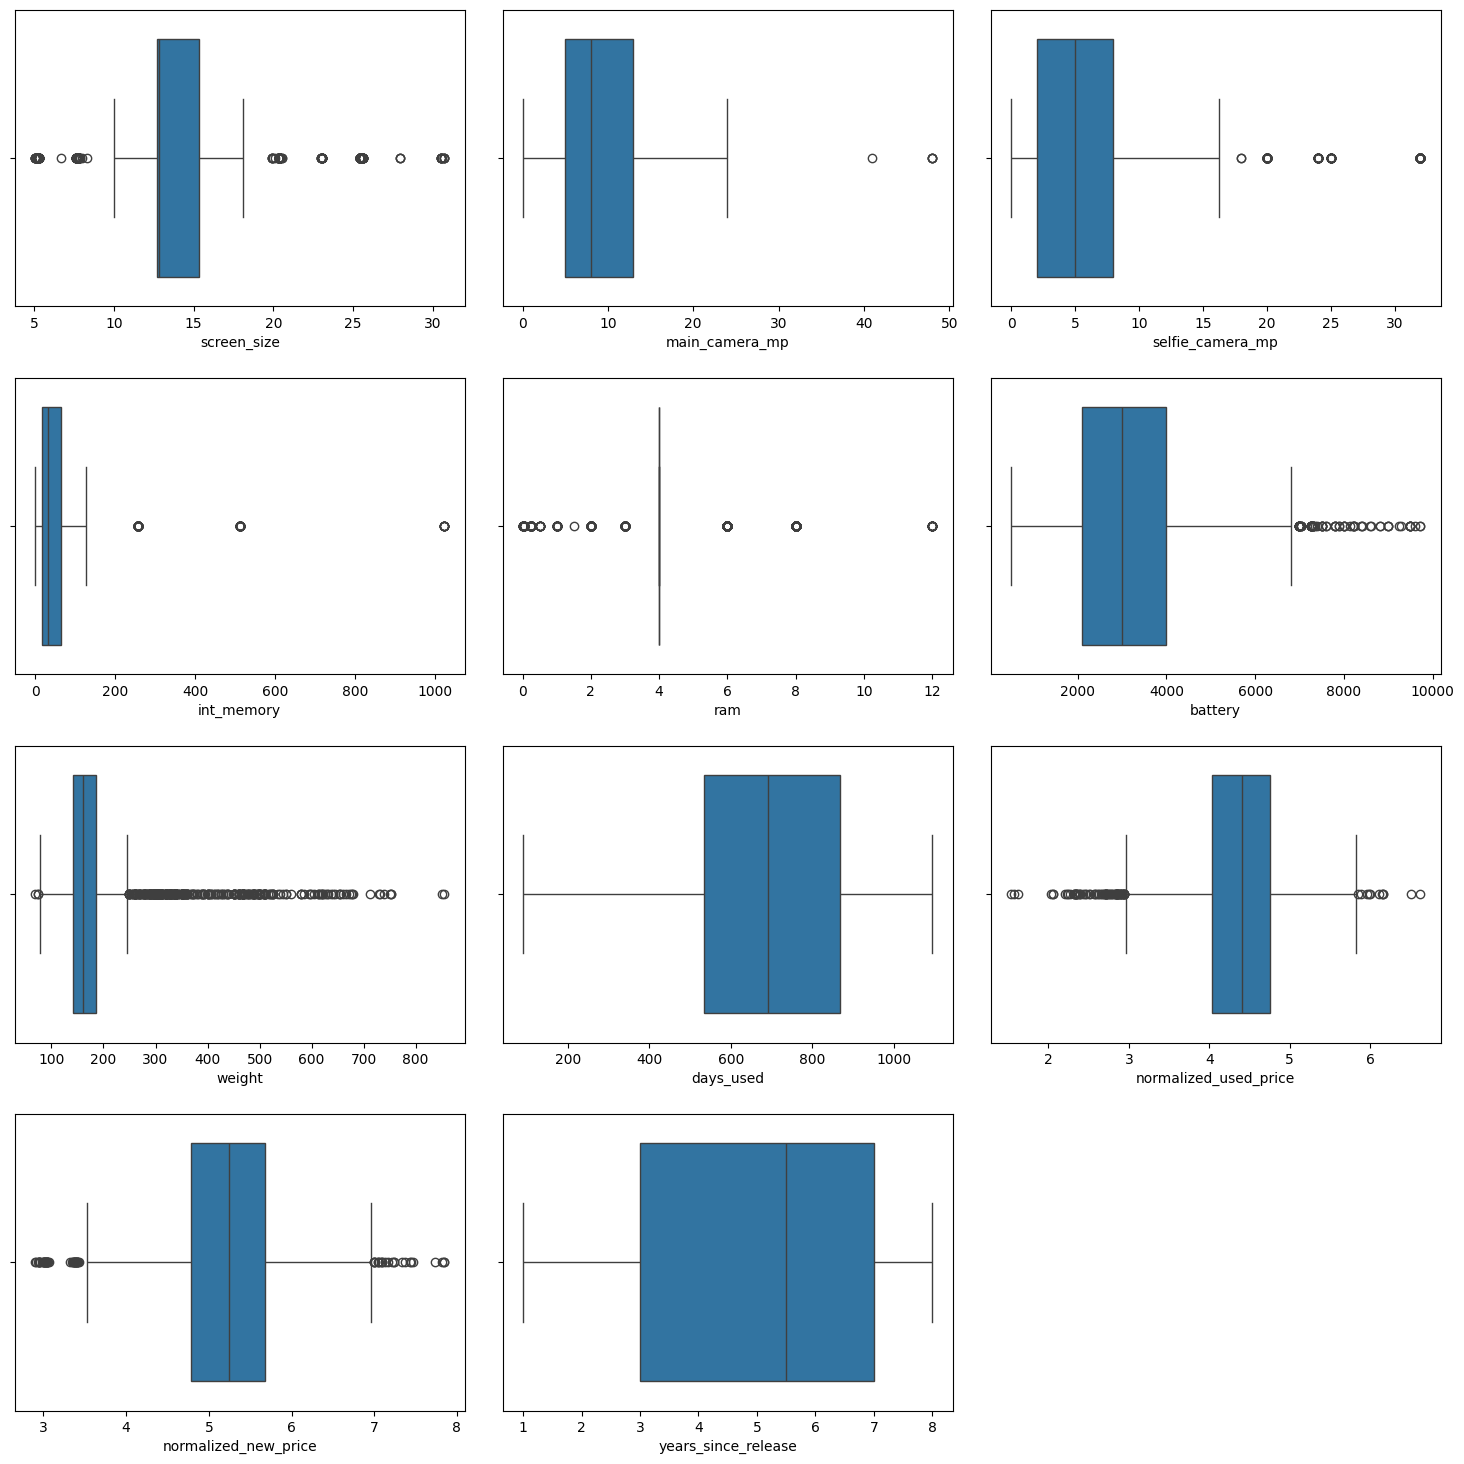

In [47]:
# outlier detection using boxplot
num_cols = cData2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=cData2, x=variable)
    plt.tight_layout(pad=2)

plt.show()

###Observations###

*   **Screen Size:** There are a few outliers with very large screen sizes, which may represent tablets or very large phones. The central cluster suggests that most devices have a screen size within a relatively narrow range.

*   **Main Camera Megapixels (MP):** There is a wide range of main camera resolutions, with several high outliers that could be high-end phones with advanced camera systems. Most devices, however, seem to cluster around a lower resolution, which could indicate standard camera specifications.

*   **Selfie Camera Megapixels (MP):** Similar to the main camera, there is a variety of resolutions for the selfie camera, with a few outliers that have very high megapixel counts, potentially indicating premium models.

*   **Internal Memory (GB):** There's a tight interquartile range with a few high outliers, suggesting that most devices come with a standard amount of internal storage, but there are some devices with exceptionally large memory capacities.

*   **RAM (GB):** Most devices have a moderate amount of RAM, but there are outliers with very high RAM, which are likely high-performance models.

*   **Battery (mAh):** The battery capacities have some outliers on the higher end, which could represent devices with larger batteries for extended use, like gaming phones or models with big screens.

*   **Weight (g):** There is a wide range of weights, with several outliers that are particularly heavy. These could be larger devices or ones with additional features like rugged casings.

*   **Days Used:** Most devices have been used for a similar number of days, with a few outliers that have been used for significantly longer periods.

*   **Normalized Used Price:** There are outliers on both the high and low ends. High-priced outliers could be premium models, while low-priced outliers could be older or less popular models.

*   **Normalized New Price:** The new price also has outliers on the high end, indicating that some devices were much more expensive when new, likely due to being flagship models or having premium features.

*   **Years Since Release:** Most devices seem to have been released within a certain timeframe, with outliers that have been on the market for much longer.

These outliers are important in a dataset because they can significantly influence the results of data analysis and predictive modeling. They could represent special cases, data errors, or genuine large deviations in the population. We will let these outliers remain and investigate them further.



### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [48]:
X = cData2.drop(["normalized_used_price"], axis=1)
y = cData2["normalized_used_price"] ##Target Variable.

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [49]:
# let's add the intercept to data
X = sm.add_constant(X)

In [50]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [51]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Model Building - Linear Regression

In [52]:
#Creating the first linear regression model#
olsmod1 = sm.OLS(y_train, x_train)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                           19:51:37   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [53]:
 ###function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [54]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsres1, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [55]:
# checking model performance on test set (seen 30% data)
y_pred = olsres1.predict(x_test)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsres1, x_test, y_test) ##Code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


###Observations###
*   $R^2$ is 0.845, which means that approximately 84.5% of the variability in the normalized used price is explained by the independent variables included in the model.

*   Adjusted $R^2$ takes into account the number of predictors in the model and penalizes the inclusion of irrelevant variables. It's slightly lower at 0.842 but still indicates a good fit.

*   The training $R^2$ is 0.84, that indicates that our base model is not underfitting. Similarly, we observe that the train and test RMSE and MAE scores are comparable, so the model is not overfitting either

*   MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data

*   MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the used price range.

*   Overall, our base model appears to explain a significant portion of the variation in the normalized used price. Next, we will further investigate multicollinearity and the distribution of residuals to ensure the model's reliability. Additionally, we will refine the model by selecting relevant features and assessing its predictive performance on a test dataset.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY


- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [56]:
# Let's define a function to check VIF.
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        if variance_inflation_factor(predictors.values, i) != float("inf")
        else float("inf")
        for i in range(len(predictors.columns))
    ]
    return vif

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    227.744081
screen_size                7.677290
main_camera_mp             2.285051
selfie_camera_mp           2.812473
int_memory                 1.364152
ram                        2.282352
battery                    4.081780
weight                     6.396749
days_used                  2.660269
normalized_new_price       3.119430
years_since_release        4.899007
brand_name_Alcatel         3.405693
brand_name_Apple          13.057668
brand_name_Asus            3.332038
brand_name_BlackBerry      1.632378
brand_name_Celkon          1.774721
brand_name_Coolpad         1.468006
brand_name_Gionee          1.951272
brand_name_Google          1.321778
brand_name_HTC             3.410361
brand_name_Honor           3.340687
brand_name_Huawei          5.983852
brand_name_Infinix         1.283955
brand_name_Karbonn         1.573702
brand_name_LG              4.849832
brand_name_Lava            1.711360
brand_name_Lenovo          4.558941
brand_name_Mei

In [58]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


### Addressing Multicollinearity (if needed)


To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [59]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [60]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


###VIF After Dropping Screen Size###

In [61]:
col_to_drop = "screen_size"

x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


###Observations###

 After dropping **'screen size'** we observe that VIF values are below 5 which means that we have dealt with multicollinearity.

In [62]:
## Creating the second revised linear regression model after dropping screen size##
olsmod2 = sm.OLS(y_train, x_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                           19:52:04   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [63]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [64]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [65]:
##Creating the third linear regression model after choosing selected features##
olsmod3 = sm.OLS(y_train, x_train3)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                           19:52:12   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [66]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod3_train_perf = model_performance_regression(olsres3, x_train3, y_train)
olsmod3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [67]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsres3, x_test3, y_test)
olsmod3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


###Observations###

The adjusted R-squared value of Model 2 indicates that approximately 83.83% of the variability in the used prices of phones and tablets is explained by the model.
The Mean Absolute Percentage Error (MAPE) of 4.395% suggests that the model's predictions are, on average, within 4.395% of the actual used prices.
Model 2 performance on the test set is consistent with the training performance, which implies that the model generalizes well to unseen data.

### TEST FOR LINEARITY AND INDEPENDENCE###


- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [68]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsres3.fittedvalues  # predicted values
df_pred["Residuals"] = olsres3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


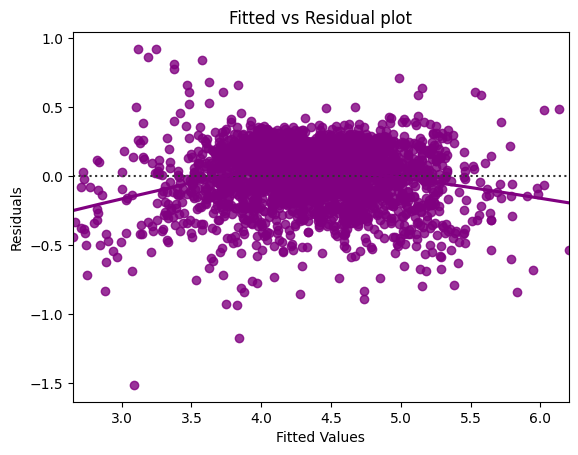

In [69]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

####Observations####

We do not observe a  pattern in the plot between residuals and fitted values, which leads us to conclude that the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

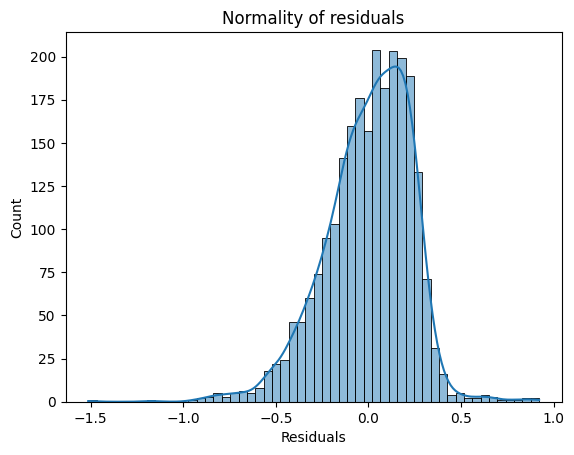

In [70]:
# normality of the residuals
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

####Observations####

*   **Histogram**: The histogram shows the frequency of the residuals, and the shape of the distribution appears approximately bell-shaped, which is an initial indicator of normality.

*   **Symmetry:** The plot suggests that the residuals are fairly symmetrically distributed about the mean, which is another good sign of normality.

*   Overall, based on the histogram, the normality assumption does not appear to be violated to any serious degree.

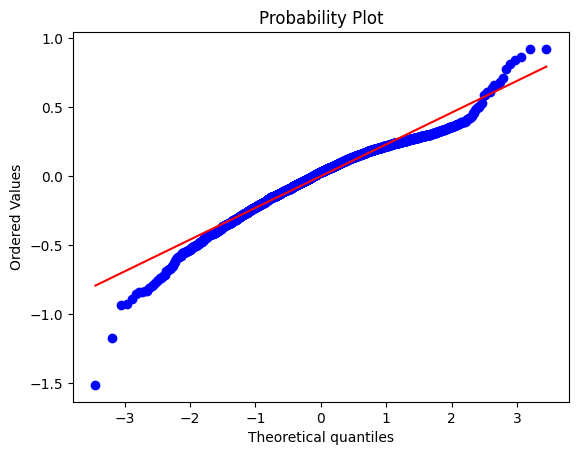

In [71]:
# Q Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

####Observations####

The Q-Q plot shows that the residuals from our regression model are approximately normally distributed, with some exceptions at the tails. These deviations could be worth investigating further, potentially leading to model refinement.

In [72]:
#Code to apply the Shapiro-Wilks test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

####Observations####

- Stricly speaking, as per the Shapiro test the p-value is less than .05 meaning the residuals are *not normal*. However the probability plot is mostly linear except the tails and the residual histplot does look normal but skewed to the left.

### TEST FOR HOMOSCEDASTICITY###

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [73]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train.astype(float))
lzip(name, test)

[('F statistic', 1.0441497804351778), ('p-value', 0.23100117162634445)]

In [74]:
# predictions on the test set
# let us create a dataframe with actual, fitted and residual values

df_pred_test = pd.DataFrame()
df_pred_test["Actual"] = y_test
df_pred_test["Predicted"] = olsres3.predict(x_test3)

df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


####Observations####

The actual values and predicted values are comparable.

## Final Model Summary##

In [75]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [76]:
olsmodel_final = sm.OLS(y_train, x_train_final)
olsres_final =olsmodel_final.fit()
print(olsres_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                           19:52:33   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsres_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [77]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsres_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


###Observations###

*   The model is able to explain ~83.6% of the variation in the data.

*   The train and test RMSE and MAE values are quite low, indicating that RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

*   The MAPE on the test set suggests we can predict within 4.5% of the normalized used price.

*   Therefore, we can conclude the model **olsmodel_final** is good for prediction as well as inference purposesList item

##  Actionable Insights and Recommendations###

**Actionable Insights and Recommendations:**

###Model:###

The final model demonstrates a solid ability to predict used prices for cell phones and tablets, accounting for over 83.6% of the data variance.

###Insights:###


1.   **Impact of New Price on Used Price:** The final model indicates that an increase in the normalized new price by one unit is associated with an increase in the normalized used price by a factor of 0.44. This highlights the strong positive relationship between the new price of a device and its subsequent resale value. It suggests that devices that are priced higher when new tend to retain more value over time, which could be indicative of perceived quality, brand value, or feature richness.

2.   **Correlation Between New and Used Prices:** A high correlation factor of 0.83 between the normalized new price and the normalized used price underpins this relationship further, suggesting that as the new prices increase or decrease, the used prices tend to follow suit quite closely.

3.   **Influence of Connectivity Technology:**  The presence of 4G technology contributes positively to the used price by 0.05 units, reflecting the current market preference for 4G capabilities in used devices. Conversely, 5G technology shows an unexpected decrease in used price by 0.06 units. This could be due to the nascent stage of 5G technology during the data collection period, potentially leading to a lower demand for 5G devices in the used market or a premium being placed on new 5G devices.

4.   **Effect of Age on Device Value:** The model captures the intuitive trend of depreciation, where each additional year since the release decreases the used price by 0.02 units. This aligns with the typical consumer expectation that older devices will be less valuable due to wear and tear, as well as obsolescence due to newer models entering the market.

###Recommendations:###
*   **Prioritize High-Value Features:** Recell should focus on acquiring and selling devices with higher capacity cameras and ample storage space as these features are significant in retaining value.

*   **Strategic Brand Focus:** The business should concentrate on popular brands to ensure a better understanding of market dynamics and to facilitate more reliable statistical analyses. This will also streamline inventory and align with consumer preferences.

*   **4G and 5G Strategy:** As the market transitions to 5G, maintain a balance between 4G and 5G devices. Despite the current negative association of 5G with used pricing, this is expected to shift positively as adoption increases.

*   **Adjust for Depreciation:** The company should consider incorporating the years since release into pricing strategies to account for depreciation and align prices with market expectations.

By implementing these recommendations, ReCell can enhance its competitive edge, optimize its inventory based on features that preserve value, and adopt a dynamic pricing strategy that reflects current market conditions.